# 자연어 처리(Natural Language Preprocessing, NLP)

- 자연어 : 사람들이 일상적으로 사용하는 언어 (대화 / 문헌 / ...)
- 자연어 처리 : 컴퓨터가 자연어를 이해하거나 생성 할 수 있도록 데이터를 처리하는 기술
- 컴퓨터 관점
    - 자연어의 경우 흐름과 맥락을 이해해야만 처리가 가능
    - 처리 과정 : 언어 -> 컴퓨터 -> 언어
    - NLU(Natural Language Understanding)
        - 언어 -> 컴퓨터 : 컴퓨터가 사람의 언어를 이해(흐름과 맥락)과정
    - NLG(Natural Language Generation)
        - 컴퓨터 -> 언어 : 컴퓨터가 사람의 언어를 사용하는 과정
    - NLU + NLG : 인공지능 서비스에서는 두 프로세스를 모두 사용 한다
    ---
    - 전산 언어학(Computational Linguistics)
        - 컴퓨팅 기술을 언어학에 접목시킨 분야 / 컴퓨터 공학 + 언어학 + 통계학
        - 어려운 영역 !!
            1. 언어의 중의성
                - "참 잘~한다" 는 긍정/부정 해석 둘다 가능
            2. 규칙 예외
                - 유행어 / 온라인,오프라인
            3. 유연함 및 확장 가능성
                - 관행적 표현 / 세대간 표현 / ...
        - 언어처리 패러다임 변화
            - 규칙 기반 : 문법적 규칙을 사전에 정의하여, 규칙을 기반으로 자연어를 처리
                - 한계점 : 언어의 중의성 / 규칙예외 ...
            - 전통 통계 기반 : 조건부 확률을 이용하여 문장에 오는 단어에 대한 확률 계산 / 단어의 빈도수 계산 등 여러가지 통계적 기술
                - 한계점 : 대량의 문장 분석 / 의도파악 ... (Ex. 직설적이 아닌, 돌려까기 등 ...)
            - 기계 학습 기반 : 전수 조사 중심의 학습 체계를 통해 텍스트 마이닝 기술이 전개 (텍스트 분류 / 네트워크 분석 / ...)
            - 신경망 알고리즘 기반 : 추상화 개념을 알고리즘 형태로 구현(신경망 알고리즘), 대량의 문장 분석 및 의도 파악 뿐 아니라, 자연어 생성, 기계번역 기술 까지 확장

# 자연어 처리 연산

1. Edit Distance : 2개의 단어가 얼마나 다른지 숫자로 나타내는 척도
    - Ex) Cat / Hat : Edit Distance -> 1 (C랑 H만 다름)
    - 단어의 유사성을 파악 할 때 사용
2. Stemming : 어간 추출, 단어의 본래 형태를 추출
    - Ex) going -> go / Computer -> Compute
    - 문장의 의도를 파악하기 위해 처리
3. Lemmatization : 문장속에 다양한 형태로 활용된 단어의 표제어를 찾는 작업
    - 표제어 : 사전에 올라가 있는 단어의 기본형
    - 문장의 의도 파악 및 단어의 유사성을 파악

In [1]:
# pip install nltk

In [2]:
import nltk # Natural Language Tool Kit
# 영어를 처리하는 라이브러리

In [3]:
# Edit Distance
from nltk.metrics import edit_distance

In [4]:
edit_distance('Cat','Hat')

1

In [5]:
edit_distance('Console','Counsel')

3

In [6]:
# Stemming
# 규칙 기반 - 사전에 정의된 단어를 이용하여 연산
from nltk.stem import PorterStemmer

In [7]:
pst = PorterStemmer()
pst.stem('Computer')

'comput'

In [8]:
pst.stem('going')

'go'

In [9]:
# Lemmatization (표제어 / 규칙 기반 - 사전에 정의된 단어를 이용하여 연산)
# 단어 사전을 다운로드 하여 연산 - 동사, 형용사, ...

# nltk.download('wordnet')
# nltk.download('omw-1.4')
# nltk.download('punkt')
# nltk.download('averaged_perceptron_tagger')

In [10]:
from nltk.stem import WordNetLemmatizer

In [11]:
wlem = WordNetLemmatizer()
wlem.lemmatize('ate', pos = 'v')

'eat'

In [12]:
wlem.lemmatize('are', pos = 'v')

'be'

In [13]:
wlem.lemmatize('went', pos = 'v')

'go'

# 형태소 분석 / 개체명 인식

1. 형태소(POS, Part of Speech)분석 (Morphological Analysis)
    - 형태소 : 가장 작은 말의 단위
    - 문장을 최소 단위, 형태소 형태로 먼저 단어를 나누어, 품사(동사 / 형용사 / 명사 / ...)를 부착
    - Tokenizing + Tagging : POS
    - Tokenizing : 텍스트(문장 Sentence) 를 특정 단위로 나누는 것
        - **어절 분리 (Word Separation)** : 문장을 각 단어의 단위로 분할
        - 문장 분리 (Sentence Separation) : 문단이나 글을 각 문장으로 분할
    - Tagging : 나눠진 형태소에 품사를 부착하는 작업
    ---
2. 개체명 인식(Named-Entity Recognition, NER)
    - 특정 명사에 대해 사람 / 조직 / 장소를 구분하여, 문장의 맥락을 이해, 동의어를 구분
    - Named-Entity 개체명 : 사람 / 조직 / 장소 등 이름을 가진 개체

**Tagging Description**

- CC : 접속사
- CD : 숫자 
- DT : 한정사 
- EX : 존재구문 
- FW : 외국어
- IN : 전치사 또는 종속 접속사
- JJ : 형용사
- JJR : 형용사 비교급
- JJS : 형용사 최고급
- MD : 조동사 
- NN : 명사 (단수 또는 질량) 
- NNS : 명사 (복수)
- NNP : 고유명사(단수)
- NNPS : 고유명사(복수)
- PDT : 전치 한정사
- POS : 소유격 
- PRP : 인칭 대명사
- PRP$ : 소유 대명사
- PB : 부사 
- PBR : 부사 비교급
- PBS : 부사 최상급
- RP : 조사 
- SYM : 상징
- TO : to
- UH : 감탄사
- VB : 동사 
- VBD : 동사 과거형
- VBG : 동명사 /현재 분사 
- VBN : 동사 (단수, 현재)
- VBZ : 동사 (3인칭 단수, 현재)
- WDT : 의문 한정사

In [14]:
# 형태소의 Tokenizing (어절분리)
word1 = 'Show me the money!'
nltk.word_tokenize(word1)

['Show', 'me', 'the', 'money', '!']

In [15]:
# 문장분리
word2 = 'My name is Data Station. What yout name?'
nltk.sent_tokenize(word2)

['My name is Data Station.', 'What yout name?']

In [16]:
word3 = '''This letter, which originated in England,
            rotates once a year to give good luck to the recipient,
            and now transferred to you must leave you within 4 days.'''

# 어절분리
token1 = nltk.word_tokenize(word3)
print(token1)

# 태깅 작업
tag1 = nltk.pos_tag(token1)
tag1

['This', 'letter', ',', 'which', 'originated', 'in', 'England', ',', 'rotates', 'once', 'a', 'year', 'to', 'give', 'good', 'luck', 'to', 'the', 'recipient', ',', 'and', 'now', 'transferred', 'to', 'you', 'must', 'leave', 'you', 'within', '4', 'days', '.']


[('This', 'DT'),
 ('letter', 'NN'),
 (',', ','),
 ('which', 'WDT'),
 ('originated', 'VBD'),
 ('in', 'IN'),
 ('England', 'NNP'),
 (',', ','),
 ('rotates', 'VBZ'),
 ('once', 'RB'),
 ('a', 'DT'),
 ('year', 'NN'),
 ('to', 'TO'),
 ('give', 'VB'),
 ('good', 'JJ'),
 ('luck', 'NN'),
 ('to', 'TO'),
 ('the', 'DT'),
 ('recipient', 'NN'),
 (',', ','),
 ('and', 'CC'),
 ('now', 'RB'),
 ('transferred', 'VBN'),
 ('to', 'TO'),
 ('you', 'PRP'),
 ('must', 'MD'),
 ('leave', 'VB'),
 ('you', 'PRP'),
 ('within', 'IN'),
 ('4', 'CD'),
 ('days', 'NNS'),
 ('.', '.')]

In [17]:
# 개체명 인식
# nltk.download()

In [18]:
word4 = '''
I got my peaches out in Georgia (oh, yeah, shit)
I get my weed from California (that's that shit)
I took my chick up to the North, yeah (badass bitch)
I get my light right from the source, yeah (yeah, that's it)
And I see you (oh), the way I breathe you in (in), it's the texture of your skin
I wanna wrap my arms around you, baby, never let you go, oh
And I say, oh, there's nothing like your touch
It's the way you lift me up, yeah
And I'll be right here with you 'til the end
'''
# 개체명 인식 (형태소 분석 후 수행)
# 토큰화
token2 = nltk.word_tokenize(word4)

# 태깅
tagged = nltk.pos_tag(token2)
entities = nltk.chunk.ne_chunk(tagged)
print(entities)

(S
  I/PRP
  got/VBD
  my/PRP$
  peaches/NNS
  out/RP
  in/IN
  (GPE Georgia/NNP)
  (/(
  oh/UH
  ,/,
  yeah/UH
  ,/,
  shit/JJ
  )/)
  I/PRP
  get/VBP
  my/PRP$
  weed/NN
  from/IN
  (GPE California/NNP)
  (/(
  that/WDT
  's/VBZ
  that/IN
  shit/NN
  )/)
  I/PRP
  took/VBD
  my/PRP$
  chick/NN
  up/RB
  to/TO
  the/DT
  (GPE North/NNP)
  ,/,
  yeah/NN
  (/(
  badass/JJ
  bitch/NN
  )/)
  I/PRP
  get/VBP
  my/PRP$
  light/JJ
  right/NN
  from/IN
  the/DT
  source/NN
  ,/,
  yeah/NN
  (/(
  yeah/UH
  ,/,
  that/DT
  's/VBZ
  it/PRP
  )/)
  And/CC
  I/PRP
  see/VBP
  you/PRP
  (/(
  oh/UH
  )/)
  ,/,
  the/DT
  way/NN
  I/PRP
  breathe/VBP
  you/PRP
  in/IN
  (/(
  in/IN
  )/)
  ,/,
  it/PRP
  's/VBZ
  the/DT
  texture/NN
  of/IN
  your/PRP$
  skin/NN
  I/PRP
  wan/VBP
  na/RB
  wrap/VB
  my/PRP$
  arms/NNS
  around/IN
  you/PRP
  ,/,
  baby/VB
  ,/,
  never/RB
  let/VB
  you/PRP
  go/VB
  ,/,
  oh/FW
  And/CC
  I/PRP
  say/VBP
  ,/,
  oh/UH
  ,/,
  there/EX
  's/VBZ
  nothing/NN
  like

# 불용어 처리

- Stopword(불용어) : 관사 / 전치사 / 조사 / 일부 접속사 등 단어 자체에 의미가 없는 단어
- 문장 검색 / 분해 / 단어 빈도수 파악 / 의미 파악

In [19]:
from nltk.corpus import stopwords

In [20]:
set(stopwords.words('english'))

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [21]:
word5 = 'Smooth like butter, like a criminal undercover Gon pop like trouble breaking into your heart like that (ooh)'

# 토큰화
token3 = nltk.word_tokenize(word5)

In [22]:
# 불용어 처리
clean_list = [] # 불용어를 처리한 뒤 형태소를 넣을 리스트를 구성

for i in token3:
    if (len(i.lower()) > 1) & (i.lower() not in set(stopwords.words('english'))):
        # len(i.lower()) > 1 : 각 단어를 소문자로 변경하여, 한 글자 이상인 데이터를 확인
        # i.lower() not in set(stopwords.words('english')) : 불용어 영어사전에 존재하지 않는 단어를 확인
        
        clean_list.append(i)
clean_list

['Smooth',
 'like',
 'butter',
 'like',
 'criminal',
 'undercover',
 'Gon',
 'pop',
 'like',
 'trouble',
 'breaking',
 'heart',
 'like',
 'ooh']

# 한국어 자연어 처리

- KoNLpy
    1. JAVA 설치 1.7 이상의 자바 (https://www.java.com/ko/download/ie_manual.jsp?locale=ko)
    2. JDK (https://www.oracle.com/kr/java/technologies/downloads/#jdk20-windows)
    3. 내컴퓨터 -> 설정 -> 고급 시스템 설정 -> 환경 변수 -> PATH 편집 -> 새로만들기(C:\Program Files\Java\jdk-20\bin 경로)
    4. 내컴퓨터 -> 설정 -> 고급 시스템 설정 -> 환경 변수 -> PATH 편집 -> 새로만들기(C:\Program Files (x86)\Java\jre-1.8\bin 경로)
    5. 내컴퓨터 -> 설정 -> 고급 시스템 설정 -> 시스템 변수 -> 새로만들기 -> JAVA_HOME , C:\Program Files\Java
    6. 시스템 변수 -> PATH 편집 -> 새로만들기 ( %JAVA_HOME%\bin )
    7. !pip install JPype1
    8. !pip install konlpy

In [23]:
import konlpy
from konlpy.tag import Okt

In [24]:
okt = Okt()

In [25]:
# Token화
text1 = '싸늘하다. 가슴에 비수가 날아와 꽂힌다. 하지만 걱정하지 마라. 손은 눈보다 빠르니까'
print(okt.morphs(text1))

['싸늘하다', '.', '가슴', '에', '비수', '가', '날아와', '꽂힌다', '.', '하지만', '걱정', '하지', '마라', '.', '손', '은', '눈', '보다', '빠르니까']


In [26]:
# Tokenizing + Stemming
print(okt.morphs(text1, stem = True))

['싸늘하다', '.', '가슴', '에', '비수', '가', '날아오다', '꽂히다', '.', '하지만', '걱정', '하다', '마르다', '.', '손', '은', '눈', '보다', '빠르다']


In [27]:
# 명사와 어절 추출
okt.nouns(text1) # 명사만 해당하는 데이터만 추출

['가슴', '비수', '걱정', '손', '눈']

In [28]:
# Tokenizing + Tagging
okt.pos(text1)

[('싸늘하다', 'Adjective'),
 ('.', 'Punctuation'),
 ('가슴', 'Noun'),
 ('에', 'Josa'),
 ('비수', 'Noun'),
 ('가', 'Josa'),
 ('날아와', 'Verb'),
 ('꽂힌다', 'Verb'),
 ('.', 'Punctuation'),
 ('하지만', 'Conjunction'),
 ('걱정', 'Noun'),
 ('하지', 'Verb'),
 ('마라', 'Adjective'),
 ('.', 'Punctuation'),
 ('손', 'Noun'),
 ('은', 'Josa'),
 ('눈', 'Noun'),
 ('보다', 'Josa'),
 ('빠르니까', 'Adjective')]

# 키워드 분석(형태소 분석)

In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rc('font', family = 'Malgun Gothic')

In [30]:
df1 = pd.read_csv('./data/배달의_민족_기업평가.csv', index_col = 0)
df1.head(2)

,직종,재직여부,지역,작성시간,한줄평,기업장점,기업단점,바라는점,기업성장여부,기업추천여부
0,경영/기획/컨설팅,현직원,서울,2019. 01. 03,"""무섭도록 빠른 속도로 성장중인 대한민국 스타트업의 상징!\n회사도 성장하고 그 안...","1. 내부구성원들을 위하는 기업문화가 형성되어있고, 실제로 운영측면에서도 배려마인드...",빠르게 성장하는회사의 특징! 바뀌는 업무가 많습니다. 하루하루 다이나믹해요.,향후 회사가 어떤 방향으로 성장해야 할지 지속적으로 고민하시고 공유해주셔서 감사합니...,성장,추천
1,경영/기획/컨설팅,현직원,서울,2019. 03. 08,"""체계적인 업무분담으로 자율성을 강조하며 사내분위기로 실무를 극대화할 수 있는 좋은...","그 누구의 눈치도 보지 않으며, 자유로운 의사소통에 내부 분위기, 팀별로 케바케 이...","팀별로 케바케, 외근 및 인테리어관련 부서는 낮과 밤이 없어보이지만 그들에게도 얼굴...","너무 좋아서 변하지 않을까 걱정이 됩니다\n지금처럼 고객, 파트너사, 직원들을 생각...",성장,추천


In [31]:
# 한줄평의 첫번째 문장에 대해 정형데이터로 변환
sent1 = df1['한줄평'].tolist()[0]
pd.DataFrame(okt.pos(sent1))

,0,1
0,"""",Punctuation
1,무섭도록,Adjective
2,빠른,Adjective
3,속도,Noun
4,로,Josa
5,성장,Noun
6,중,Suffix
7,인,Josa
8,대한민국,Noun
9,스타트업,Noun


In [32]:
# 전체 한줄평을 정형데이터로 변환하여, 명사만 추출
# df1['']에 분석하고 싶은 컬럼명 변경가능

df_pos = pd.DataFrame()

for sent in range(0, len(df1['바라는점'])):
    df_n = pd.DataFrame(okt.pos(df1['바라는점'].tolist()[sent]))
    df_pos = pd.concat([df_pos, df_n])
df1_pos = df_pos.rename(columns = {0 : '형태소', 1 : '품사'})
df1_pos.head(2)

,형태소,품사
0,향후,Noun
1,회사,Noun


In [33]:
# 명사만 추출하여, 키워드 분석 실시
df1_N = df1_pos.loc[df1_pos['품사'] == 'Noun']

In [34]:
df1_N['형태소'].value_counts()

직원      34
회사      33
것       30
수       27
더       26
        ..
공간       1
교육제도     1
신입사원     1
신입       1
오래오래     1
Name: 형태소, Length: 564, dtype: int64

In [35]:
from wordcloud import WordCloud, STOPWORDS

In [36]:
wc = WordCloud(background_color='white', width = 800, height = 600,
               font_path='C:/Windows/Fonts/Malgun.ttf').generate(' '.join(df1_N['형태소']))

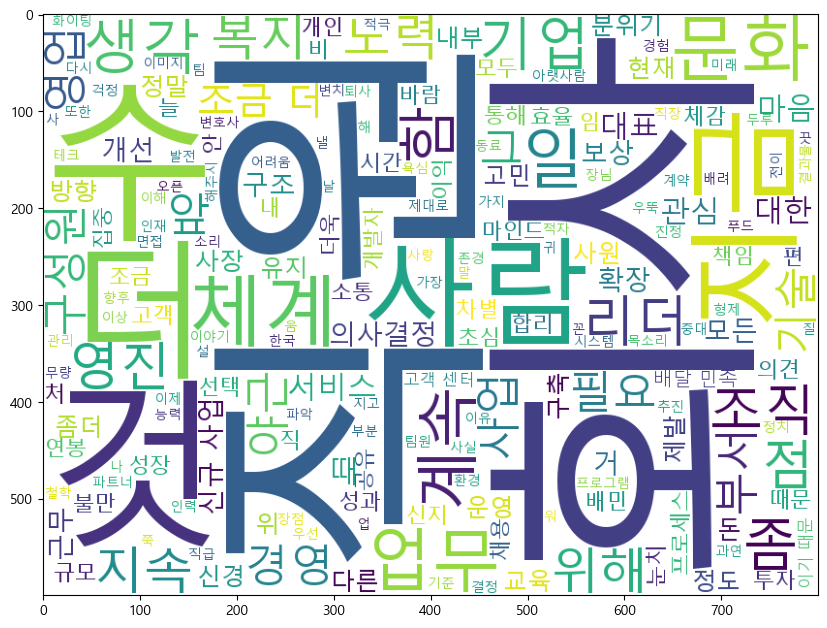

In [37]:
plt.figure(figsize=(10,10))
plt.imshow(wc)
plt.show()

# 단어표현(Word Representation)

- 언어적인 특성을 활용하여 단어를 수치화 -> 컴퓨터가 이해할 수 있는 형태로 변환
- Word Embedding 또는 Word Vector라고 표현하기도 함
- **통계 기반**의 자연어를 처리하는 가장 근본되는 부분
- 텍스트 마이닝의 선행 단계로 사용
- 3가지 방식
    1. One Hot Encoding : 단어의 존재 여부를 1 또는 0 으로 변환하여 표현
    2. Continuous Bag of Words : 문서 내 모든 단어의 빈도수를 바탕으로 Feature 추출
    3. Term Frequence inverse document frequency (TF - IDF) : 자주 등장하는 단어에 패널티를 부여하여 변환

# One Hot Encoding
- 문장 내 모든 단어를 1 또는 0으로 변환
- 해당 단어에 값이 있다면 1 / 없다면 0으로 변환
- 장점
    1. 방법 자체가 간단
    2. 컴퓨터나 사람이 이해하기 쉬움
- 단점 
    1. 대량의 Text를 분석하거나, 문장 내 사용된 단어의 종류가 많을 경우, 벡터의 크기가 커져 비효율적
    2. 벡터 자체에 의미가 없으므로, 단어의 의미나 특성이 반영되지 않음

In [38]:
text3 = '그대 기억이 지난 사랑이 내 안을 파고드는 가시가 되어, 제발 가라고 아주 가라고 애써도 나를 괴롭히는데'
df2 = pd.DataFrame(okt.pos(text3), columns = ['단어','품사'])

In [39]:
pd.get_dummies(df2['단어'])

,",",가,가라,가시,고,괴롭히는데,그대,기억,나를,내,되어,사랑,아주,안,애써도,을,이,제발,지난,파고드는
0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
6,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


# Continuous Bag of Word (CBOW, BOW)

- 문서 내 모든 단어를 모아놓고, 단어의 빈도수를 이용해 Feature 구성하는 작업
- 장점
    1. 문장의 특성을 잘 나타낼 수 있음
    2. 넓은 범위의 (비교적 긴 문장)에서 사용이 가능하고 쉽고 빠른 구축이 가능
    3. 현재까지도 많이 사용되는 직관적이고 기본적인 벡터화 기법
- 단점
    1. Semantic Context : 문장 내 단어의 문맥적 의미를 반영하기 어려움
    2. 단어의 순서를 고려하지 않음
        - Ex. '나 고양이 좋아하다' 를 '고양이 나 좋아하다'와 같은 의미가 됌
    3. Sparse Matrix : 단어가 많은 경우, 희소 행렬 형태로 벡터가 구성이 됌
    4. 대부분의 행렬이 0으로 채워져 분석의 속도를 저하하여 예측성능도 하락함

In [40]:
from konlpy.tag import Kkma # 형태소 분석기
from sklearn.feature_extraction.text import CountVectorizer # BOW

In [41]:
text4 = '너와 함께 한 시간 모두 눈부셨다. 날이 좋아서, 날이 좋지 않아서, 날이 적당해서, 모든 날이 좋았다. 그리고 무슨일이 벌어져도 니 잘못이 아니다.'

In [42]:
kma = Kkma()
sent1 = kma.sentences(text4) # 어절분리 (sentences)
sent1

['너와 함께 한 시간 모두 눈부셨다.',
 '날이 좋아서, 날이 좋지 않아서, 날이 적당해서, 모든 날이 좋았다.',
 '그리고 무슨 일이 벌어져도 니 잘못이 아니다.']

In [43]:
bow = CountVectorizer()
x = bow.fit_transform(sent1)
bow.get_feature_names_out() # 문장 내 단어 유형 Index 확인

array(['그리고', '날이', '너와', '눈부셨다', '모두', '모든', '무슨', '벌어져도', '시간', '아니다',
       '않아서', '일이', '잘못이', '적당해서', '좋아서', '좋았다', '좋지', '함께'], dtype=object)

In [44]:
x.toarray() # 각 문장에서 단어 Index 별로 빈도수를 계산

array([[0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 4, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0],
       [1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0]],
      dtype=int64)

In [45]:
pd.DataFrame(x.toarray(), columns = bow.get_feature_names_out())

,그리고,날이,너와,눈부셨다,모두,모든,무슨,벌어져도,시간,아니다,않아서,일이,잘못이,적당해서,좋아서,좋았다,좋지,함께
0,0,0,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1
1,0,4,0,0,0,1,0,0,0,0,1,0,0,1,1,1,1,0
2,1,0,0,0,0,0,1,1,0,1,0,1,1,0,0,0,0,0


# Term Frequence Inverse Document Frequency (TF-IDF)

- CBOW을 보완하기 위해, 개별 문서나 문장 내 자주 등장하는 단어에 가중치를 두되, 문서 전체에 걸쳐 전반적으로 등장하는 단어에 대해서는 패널티를 부여하여 확률 값으로 벡터화
- 특정 문장에 많이 등장하는 단어는 강조를 위해 사용되었을 가능성이 높지만, 문서 전체에 전반적으로 많이 사용되는 단어는 범용적으로 사용되었을 가능성이 높음
- 가중치를 이용해 범용적으로 사용하는 단어는 제거를 하고, 강조되는 단어를 찾아내어 텍스트 마이닝에 적용시킬 수 있음

In [46]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [47]:
tfidf = TfidfVectorizer()
x = tfidf.fit_transform(sent1)
pd.DataFrame(x.toarray(), columns = tfidf.get_feature_names_out())

,그리고,날이,너와,눈부셨다,모두,모든,무슨,벌어져도,시간,아니다,않아서,일이,잘못이,적당해서,좋아서,좋았다,좋지,함께
0,0.000000,0.000000,0.447214,0.447214,0.447214,0.000000,0.000000,0.000000,0.447214,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.447214
1,0.000000,0.852803,0.000000,0.000000,0.000000,0.213201,0.000000,0.000000,0.000000,0.000000,0.213201,0.000000,0.000000,0.213201,0.213201,0.213201,0.213201,0.000000
2,0.408248,0.000000,0.000000,0.000000,0.000000,0.000000,0.408248,0.408248,0.000000,0.408248,0.000000,0.408248,0.408248,0.000000,0.000000,0.000000,0.000000,0.000000


# 문장 표현 (Sentence Representation)

- 텍스트 분류 및 연관성 분석 등 텍스트 마이닝에서 일정량 이상의 텍스트를 처리하기 위한 문장 표현 방법
- 문장 표현
    1. Text to Sequence
    2. Padding

# Text to Sequence

- 문장 내 단어들을 하나의 정수와 매칭시켜, 한 문장을 여러개의 정수로 구성
- 컴퓨터만의 단어 사전을 구축 -> 문장 내 각 단어들의 위치정보를 정수로 표현(단어에 순서가 표현됨)

In [48]:
df1.head(2)

,직종,재직여부,지역,작성시간,한줄평,기업장점,기업단점,바라는점,기업성장여부,기업추천여부
0,경영/기획/컨설팅,현직원,서울,2019. 01. 03,"""무섭도록 빠른 속도로 성장중인 대한민국 스타트업의 상징!\n회사도 성장하고 그 안...","1. 내부구성원들을 위하는 기업문화가 형성되어있고, 실제로 운영측면에서도 배려마인드...",빠르게 성장하는회사의 특징! 바뀌는 업무가 많습니다. 하루하루 다이나믹해요.,향후 회사가 어떤 방향으로 성장해야 할지 지속적으로 고민하시고 공유해주셔서 감사합니...,성장,추천
1,경영/기획/컨설팅,현직원,서울,2019. 03. 08,"""체계적인 업무분담으로 자율성을 강조하며 사내분위기로 실무를 극대화할 수 있는 좋은...","그 누구의 눈치도 보지 않으며, 자유로운 의사소통에 내부 분위기, 팀별로 케바케 이...","팀별로 케바케, 외근 및 인테리어관련 부서는 낮과 밤이 없어보이지만 그들에게도 얼굴...","너무 좋아서 변하지 않을까 걱정이 됩니다\n지금처럼 고객, 파트너사, 직원들을 생각...",성장,추천


In [49]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [50]:
df1['한줄평']

0      "무섭도록 빠른 속도로 성장중인 대한민국 스타트업의 상징!\n회사도 성장하고 그 안...
1      "체계적인 업무분담으로 자율성을 강조하며 사내분위기로 실무를 극대화할 수 있는 좋은...
2                          "개발자가 대우받으며 일할 수 있는곳, 워라밸 좋음"
3      "일하기 좋은 회사. 누구라도 잘 알고 있는 회사인만큼 실제로도 매우 만족스러운 회...
4      "무섭도록 빠른 속도로 성장중인 대한민국 스타트업의 상징!\n회사도 성장하고 그 안...
                             ...                        
147    "조직문화가 최대 강점! 구성원 모두가 일도 잘하지만 인격적으로도 우수하신 분들이 많음"
148            "신입직으로는 사실 불행일 수도 있습니다. 이런 회사가 흔치 않으니까요."
149                             "자유롭고 편안한 분위기 미래가 보이는 곳"
150    BEST\n"IT업계치고 야근없는 회사가 있을까. 그래도 매우 만족하는 이유는 회사...
151    "자신이 하는 일에 대한 성과를 바로 볼 수있고 진짜 대단한 분들 아래에서 일을 배...
Name: 한줄평, Length: 152, dtype: object

In [51]:
tts = Tokenizer()
tts.fit_on_texts(df1['한줄평'])

In [52]:
tts.texts_to_sequences(df1['한줄평'])

[[90, 50, 91, 92, 51, 29, 93, 94, 16, 52, 53, 95, 16],
 [96, 97, 98, 99, 100, 101, 102, 1, 3, 4, 2],
 [19, 30, 7, 1, 43, 103, 20],
 [21,
  4,
  2,
  265,
  11,
  266,
  3,
  267,
  268,
  12,
  269,
  104,
  4,
  44,
  13,
  54,
  7,
  1,
  3,
  4,
  105],
 [90, 50, 91, 92, 51, 29, 93, 94, 16, 52, 53, 95, 16],
 [270,
  106,
  271,
  45,
  55,
  12,
  31,
  272,
  273,
  274,
  107,
  275,
  276,
  277,
  278,
  108,
  279,
  12,
  280,
  281,
  109,
  110,
  282,
  56,
  57,
  283,
  6,
  284,
  285,
  286,
  287,
  288,
  289,
  290,
  291,
  58,
  292,
  293],
 [106,
  294,
  107,
  32,
  295,
  296,
  297,
  111,
  298,
  299,
  12,
  300,
  301,
  9,
  112,
  302,
  303,
  304],
 [19, 30, 7, 1, 43, 103, 20],
 [96, 97, 98, 99, 100, 101, 102, 1, 3, 4, 2],
 [305, 16, 3, 2, 59, 306, 307, 33, 2],
 [113, 308, 309, 310, 108, 311, 114, 115],
 [34, 1, 3, 23, 35, 24, 312, 116, 313, 314, 5],
 [315, 316, 17, 34, 1, 3, 317, 318, 319],
 [117, 118, 7, 1, 3, 5, 320, 119, 321, 322, 120, 1, 14],
 [6

In [53]:
tts.word_index

{'수': 1,
 '회사': 2,
 '있는': 3,
 '좋은': 4,
 '곳': 5,
 '기업': 6,
 '일할': 7,
 '분위기': 8,
 '회사가': 9,
 '다양한': 10,
 '잘': 11,
 '매우': 12,
 '함께': 13,
 '있다': 14,
 '젊은': 15,
 '성장하고': 16,
 '많이': 17,
 '다른': 18,
 '개발자가': 19,
 '좋음': 20,
 '일하기': 21,
 '문화를': 22,
 '것이': 23,
 '하지만': 24,
 '많은': 25,
 '복지가': 26,
 '할': 27,
 '젊고': 28,
 '스타트업의': 29,
 '대우받으며': 30,
 '좋고': 31,
 '자유롭고': 32,
 '하는': 33,
 '배울': 34,
 '많음': 35,
 '스타트업': 36,
 '만큼': 37,
 '자유로운': 38,
 '사람들이': 39,
 '대한': 40,
 '분위기가': 41,
 '회사를': 42,
 '있는곳': 43,
 '사람들과': 44,
 '개발자': 45,
 '의견을': 46,
 '수평적인': 47,
 '일을': 48,
 'it': 49,
 '빠른': 50,
 '대한민국': 51,
 '그': 52,
 '안에서': 53,
 '즐겁게': 54,
 '대우가': 55,
 '있어서': 56,
 '서로': 57,
 '미래가': 58,
 '구성원들을': 59,
 '열린회사': 60,
 '많다': 61,
 '통해': 62,
 '배달앱': 63,
 '복지와': 64,
 '생각보다': 65,
 '본인이': 66,
 '사내': 67,
 '노력하는': 68,
 '대기업': 69,
 '대우를': 70,
 '복지도': 71,
 '가는': 72,
 '있음': 73,
 '문화': 74,
 '있지만': 75,
 '싶은': 76,
 '기업문화를': 77,
 '외부에서': 78,
 '정말': 79,
 '비해': 80,
 '있으나': 81,
 '받으며': 82,
 '성장이': 83,
 '기대되는': 84,
 '배우고': 85,
 '복지': 86,

# Padding

- 텍스트 길이에 따라 Vector(Sequence)크기가 달라지면서, 학습이 불가능한 상황이 발생
- 이를 방지하기 위해 가장자리를 0값으로 채워넣어, Matrix의 형태가 유지되도록 변환하는 작업
- 기계학습을 수행하기 위한 필수 작업

In [54]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [55]:
text_seq = tts.texts_to_sequences(df1['한줄평'])
pad_sequences(text_seq, padding = 'post', maxlen = 50).shape

(152, 50)

# 텍스트 분류 Text Classification

- 특정 텍스트를 사용자가 지정한 몇 가지 범주(class)중 어느 곳에 속하는지 분류 / 감정분석

In [56]:
df1['기업성장여부'].value_counts()

성장    110
비슷     42
Name: 기업성장여부, dtype: int64

In [57]:
# 한줄평 데이터가 왔을 때, 기업의 성장 / 정체 분류 모델 구성
df1['Target'] = df1['기업성장여부'].replace({'성장' : 1, '비슷' : 0})
df1['Target'].value_counts()

1    110
0     42
Name: Target, dtype: int64

In [58]:
Y = df1['Target']
X = df1['한줄평']

In [59]:
# Text to Sequence
token = Tokenizer()
token.fit_on_texts(X)

In [60]:
X_sequence = token.texts_to_sequences(X)

In [61]:
# Padding
X_input = pad_sequences(X_sequence, padding= 'post', maxlen=50)

In [62]:
# ML 적용
# 나이브 베이즈 모델 : 조건부 확률을 이용하여 , 해당 텍스트가 1 또는 0로 분류될 확률을 확률 분포로 추정하여 분류
from sklearn.naive_bayes import GaussianNB

In [63]:
model = GaussianNB()
model.fit(X_input, Y)

GaussianNB()

In [64]:
# 분류모델 성능평가
from sklearn.metrics import classification_report

In [65]:
Y_pred = model.predict(X_input)
report_test = classification_report(Y, Y_pred, output_dict=True)
res_test = pd.DataFrame(report_test).T
res_test

,precision,recall,f1-score,support
0,0.291667,1.000000,0.451613,42.000000
1,1.000000,0.072727,0.135593,110.000000
accuracy,0.328947,0.328947,0.328947,0.328947
macro avg,0.645833,0.536364,0.293603,152.000000
weighted avg,0.804276,0.328947,0.222914,152.000000


# 성능 향상을 위한 특성공학 적용 및 알고리즘 비교

- 현재 성능이 좋지 않음
- 성능을 올리기 위한 작업이 필요
    1. 자연어처리 : 불용어 처리
    2. 교차검증 및 하이퍼 파라미터 튜닝
    3. 고성능의 Ensemble 알고리즘

In [66]:
# 불용어 및 특수문자 제거
import re

In [67]:
# 불용어 사전 불러오기
df_stopword = pd.read_csv('./data/stopword.txt', names = ['불용어'])
df_stopword

,불용어
0,하다
1,곳
2,수
3,많다
4,없다
...,...
694,일곱
695,여덟
696,아홉
697,령


In [68]:
# 불용어 set 생성
stopword_set = set(df_stopword['불용어'].values.tolist())

In [69]:
# 불용어 및 특수문자를 제거
def text_prepro(i, remove_stopword = False):
    okt = Okt() # 형태소 분석 함수
    
    # 특수문자 제거
    remove_text = re.sub('[!1(+.)""\\n,@2345?]', '', i)
    word_text = okt.morphs(remove_text, stem=True) # 형태소 분석 및 Stemming
    
    # 불용어 사전을 이용해, 불용어 제거
    if remove_stopword:
        word_text = [token for token in word_text if not token in stopword_set]
        # word_text안에 있는 각각의 token들이 stopword_set(불용어 사전)에 있지 않을 때만 token 추출
        
    return word_text

In [70]:
clean_X = []

for i in df1['한줄평']:
    if type(i) == str: # 한줄평을 가져왔을 때, 문자가 들어가 있는 경우에만 불용어 처리(안쓴경우 넘어가기 위함)
        clean_X.append(text_prepro(i,remove_stopword=True))
    else: # Null값인 경우도 채워넣기 위함 --> 머신러닝시 Y값과 shape를 맞추기 위해
        clean_X.append([])

In [71]:
# Text to Sequence
token = Tokenizer()
token.fit_on_texts(clean_X)
X_sequence = token.texts_to_sequences(clean_X)

# Padding
X_input = pad_sequences(X_sequence, padding='post', maxlen=50)

In [72]:
# 특성공학 (교차검증 + 하이퍼파라미터 튜닝)
from imblearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [73]:
pipe_model = make_pipeline(MinMaxScaler(), RandomForestClassifier())

In [74]:
hyper_param = {'randomforestclassifier__max_depth' : range(5,10),
              'randomforestclassifier__min_samples_split' : range(5,10),
              'randomforestclassifier__criterion' : ['gini','entropy']}

In [75]:
grid_model = GridSearchCV(pipe_model, param_grid=hyper_param, cv = 5, scoring='f1', n_jobs = -1)
grid_model.fit(X_input, Y)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                                       ('randomforestclassifier',
                                        RandomForestClassifier())]),
             n_jobs=-1,
             param_grid={'randomforestclassifier__criterion': ['gini',
                                                               'entropy'],
                         'randomforestclassifier__max_depth': range(5, 10),
                         'randomforestclassifier__min_samples_split': range(5, 10)},
             scoring='f1')

In [76]:
best_model = grid_model.best_estimator_
best_model

Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('randomforestclassifier',
                 RandomForestClassifier(criterion='entropy', max_depth=8,
                                        min_samples_split=6))])

In [77]:
Y_pred = best_model.predict(X_input)
report_test = classification_report(Y, Y_pred, output_dict=True)
res_test = pd.DataFrame(report_test).T
res_test

,precision,recall,f1-score,support
0,1.000000,0.714286,0.833333,42.000000
1,0.901639,1.000000,0.948276,110.000000
accuracy,0.921053,0.921053,0.921053,0.921053
macro avg,0.950820,0.857143,0.890805,152.000000
weighted avg,0.928818,0.921053,0.916515,152.000000


# 텍스트 유사도 (비지도 학습)

- 서로 비슷한 텍스트가 얼마나 유사한지 표현하는 방식, 문장의 구조는 다르지만 의미가 같은 경우 / 동의어를 사용하여 문장을 구성한 경우
- 사용하고 있는 문장 내 단어들 간의 유사도 측정

In [78]:
# pip install networkx # 유사도를 계산하여 네트워크 분석이라는 기법으로 데이터를 시각화하는 라이브러리

In [79]:
# pip install apyori # 유사도를 계산하는 라이브러리

In [80]:
import networkx as nx
from apyori import apriori

In [81]:
# min_support : 최소 지지도 값
# --> 전체 데이터 수 에서, 두 데이터가 동시에 포함하는 수의 비율

res = list(apriori(clean_X, min_support = 0.05))
df2 = pd.DataFrame(res)

In [82]:
# 지지도를 계산하여 묶인 단어의 개수를 하나의 변수로 선언
df2['count'] = df2['items'].apply(lambda x: len(x))
df3 = df2.loc[df2['count'] == 2]
df3

,items,support,ordered_statistics,count
23,"(문화, 기업)",0.105263,"[((), (문화, 기업), 0.10526315789473684, 1.0), ((기...",2
24,"(기업, 회사)",0.072368,"[((), (기업, 회사), 0.07236842105263158, 1.0), ((기...",2
25,"(문화, 회사)",0.078947,"[((), (문화, 회사), 0.07894736842105263, 1.0), ((문...",2
26,"(복지, 회사)",0.078947,"[((), (복지, 회사), 0.07894736842105263, 1.0), ((복...",2
27,"(회사, 분위기)",0.052632,"[((), (분위기, 회사), 0.05263157894736842, 1.0), ((...",2
28,"(회사, 사람)",0.078947,"[((), (사람, 회사), 0.07894736842105263, 1.0), ((사...",2
29,"(성장하다, 회사)",0.085526,"[((), (성장하다, 회사), 0.08552631578947369, 1.0), (...",2
30,"(스타트업, 회사)",0.078947,"[((), (스타트업, 회사), 0.07894736842105263, 1.0), (...",2


In [83]:
# 네트워크 분석
graph_model = nx.Graph()
pr = nx.pagerank(graph_model)
graph_model.add_edges_from(df3['items']) # 엣지를 설정 --> items 값

pos = nx.kamada_kawai_layout(graph_model) # 그래프의 유형

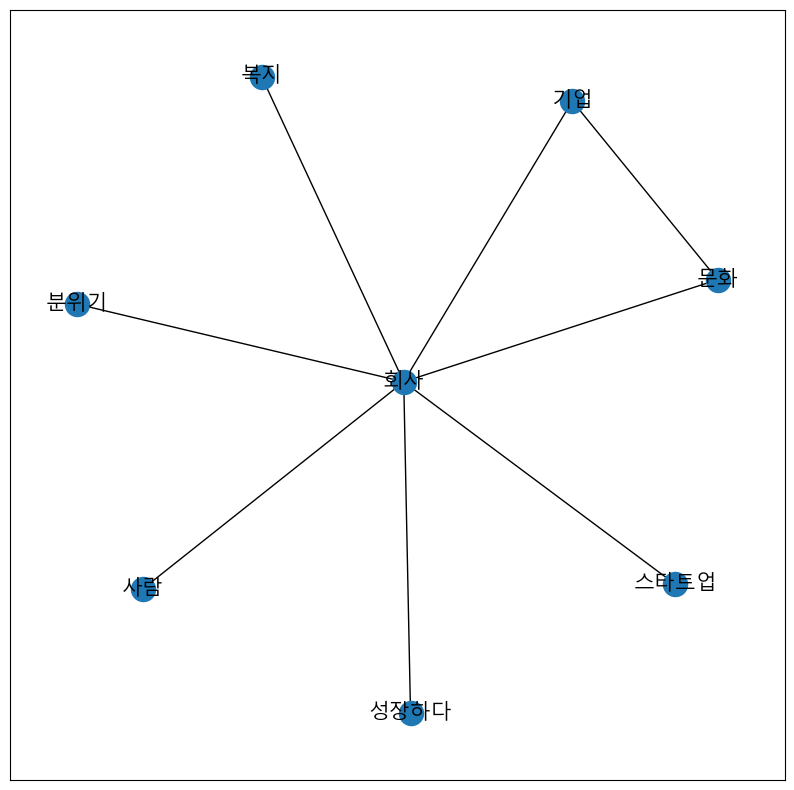

In [84]:
plt.figure(figsize = (10,10))
nx.draw_networkx(graph_model, font_family = 'Malgun Gothic', font_size = 15, pos = pos)
plt.show()

# Last Mission

- 배민 텍스트 데이터 사용하여 다음을 해결하여라

In [85]:
# 1. '기업장점', '기업단점' 데이터 이용하여, 기업 장/단점 텍스트를 하나로 묶어 하나의 Column으로 바꾸어 '기업평가'로,
# 장/단점 여부를 'Target'으로 Column을 선언하여, df4 데이터 테이블 생성

a = pd.DataFrame({'기업평가' : df1['기업장점'], 'Target' : '장점'})
b = pd.DataFrame({'기업평가' : df1['기업단점'], 'Target' : '단점'})

df4 = pd.concat((a,b)).reset_index(drop=True)
df4

,기업평가,Target
0,"1. 내부구성원들을 위하는 기업문화가 형성되어있고, 실제로 운영측면에서도 배려마인드...",장점
1,"그 누구의 눈치도 보지 않으며, 자유로운 의사소통에 내부 분위기, 팀별로 케바케 이...",장점
2,"도서구입비 무제한 지원, 주 35시간 근무, 월요일은 오후1시 출근,",장점
3,자율적인 분위기와 좋은 복지를 많이 갖춘 곳. 좋은 사람들이 많이 모여있고 그 안에...,장점
4,"1. 내부구성원들을 위하는 기업문화가 형성되어있고, 실제로 운영측면에서도 배려마인드...",장점
...,...,...
299,딱히 없음. 회사가 좋아서 여기 있다가 이직하실때 오히려 다른 회사에 적응못할 수있...,단점
300,대기업처럼 체계적으로 시스템이 많이 갖추어지지는 않았어요. 그래서 지금 열심히 만들...,단점
301,로테이션 근무\n교육 커리큘럼의 체계가 잡혀있지 않음,단점
302,아이티는 어쩔수 없다. 업무량대폭발. !!!! 그래도 야근은 종종 철야는 아주아주 ...,단점


In [86]:
# 2. '기업평가' Text를 Text to Sequence 와 Padding 기법을 적용, 불용어 처리를 하여, 데이터를 전처리

df4['Target_num'] = df4['Target'].replace({'장점' : 1, '단점' : 0})
df4['Target_num'].value_counts()

1    152
0    152
Name: Target_num, dtype: int64

In [87]:
clean_X = []

for i in df4['기업평가']:
    if type(i) == str:
        clean_X.append(text_prepro(i,remove_stopword=True))
    else:
        clean_X.append([])

In [88]:
# Text to Sequence
token = Tokenizer()
token.fit_on_texts(clean_X)
X_sequence = token.texts_to_sequences(clean_X)

# Padding
X_input = pad_sequences(X_sequence, padding='post', maxlen=50)

In [89]:
# 3. 학습데이터와 검증 데이터로 분할
Y = df4['Target_num']

x_train, x_test, y_train, y_test = train_test_split(X_input, Y, random_state=42)

In [90]:
# 4. 파이프라인을 구성하여, Randomforest model로 분류 모델 구성, 학습데이터로 학습 수행 / 검증데이터로 평가

pipe_model = make_pipeline(MinMaxScaler(), RandomForestClassifier())

hyper_param = {'randomforestclassifier__max_depth' : range(5,10),
              'randomforestclassifier__min_samples_split' : range(5,10),
              'randomforestclassifier__criterion' : ['gini','entropy']}

grid_model = GridSearchCV(pipe_model, param_grid=hyper_param, cv = 5, scoring='f1', n_jobs = -1)
grid_model.fit(x_train, y_train)

best_model = grid_model.best_estimator_
best_model

Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('randomforestclassifier',
                 RandomForestClassifier(criterion='entropy', max_depth=9,
                                        min_samples_split=6))])

In [91]:
def evaluation_classifier(model):
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)
    
    report_train = classification_report(y_train, y_train_pred, output_dict=True)
    res_train = pd.DataFrame(report_train).T
    
    report_test = classification_report(y_test, y_test_pred, output_dict=True)
    res_test = pd.DataFrame(report_test).T
    display(res_train)
    display(res_test)

In [92]:
evaluation_classifier(best_model)

,precision,recall,f1-score,support
0,1.000000,0.921739,0.959276,115.000000
1,0.926230,1.000000,0.961702,113.000000
accuracy,0.960526,0.960526,0.960526,0.960526
macro avg,0.963115,0.960870,0.960489,228.000000
weighted avg,0.963438,0.960526,0.960478,228.000000


,precision,recall,f1-score,support
0,0.740741,0.540541,0.625000,37.000000
1,0.653061,0.820513,0.727273,39.000000
accuracy,0.684211,0.684211,0.684211,0.684211
macro avg,0.696901,0.680527,0.676136,76.000000
weighted avg,0.695747,0.684211,0.677482,76.000000


## 시각화 : 기업 장점 / 단점

In [93]:
clean_X_장점 = []
clean_X_단점 = []

for i in df1['기업장점']:
    if type(i) == str:
        clean_X_장점.append(text_prepro(i,remove_stopword=True))
    else:
        clean_X_장점.append([])
        
for i in df1['기업단점']:
    if type(i) == str:
        clean_X_단점.append(text_prepro(i,remove_stopword=True))
    else:
        clean_X_단점.append([])        

In [94]:
res_장점 = list(apriori(clean_X_장점, min_support = 0.05))
res_단점 = list(apriori(clean_X_단점, min_support = 0.05))

df_장점 = pd.DataFrame(res_장점)
df_단점 = pd.DataFrame(res_단점)

In [95]:
# 지지도를 계산하여 묶인 단어의 개수를 하나의 변수로 선언
df_장점['count'] = df_장점['items'].apply(lambda x: len(x))
df_단점['count'] = df_단점['items'].apply(lambda x: len(x))

df_장점_2 = df_장점.loc[df_장점['count'] == 2]
df_단점_2 = df_단점.loc[df_단점['count'] == 2]

In [96]:
# 네트워크 분석
graph_model_장점 = nx.Graph()
graph_model_단점 = nx.Graph()

pr_장점 = nx.pagerank(graph_model_장점)
pr_단점 = nx.pagerank(graph_model_단점)

graph_model_장점.add_edges_from(df_장점_2['items'])
graph_model_단점.add_edges_from(df_단점_2['items'])

pos_장점 = nx.kamada_kawai_layout(graph_model_장점)
pos_단점 = nx.kamada_kawai_layout(graph_model_단점)

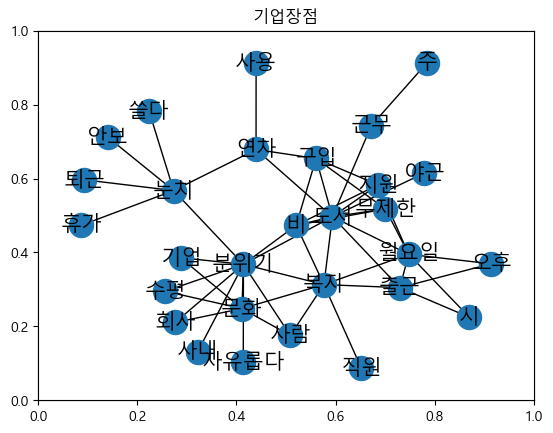

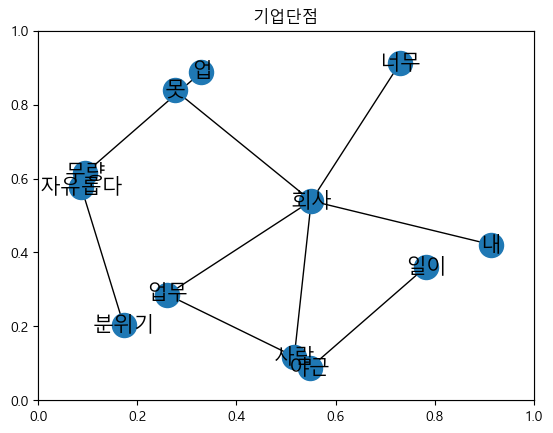

In [97]:
G = nx.path_graph(8)
E = nx.path_graph(30)

# two separate graphs
fig1 = plt.figure()
plt.title('기업장점')
ax1 = fig1.add_subplot(111)
nx.draw_networkx(graph_model_장점, font_family = 'Malgun Gothic', font_size = 15, pos = pos_장점, ax = ax1)

fig2 = plt.figure()
plt.title('기업단점')
ax2 = fig2.add_subplot(111)
nx.draw_networkx(graph_model_단점, font_family = 'Malgun Gothic', font_size = 15, pos = pos_단점, ax = ax2)